# Partie 1

Nous commençons par voir comment PyG stocke les graphes en tenseurs. Ensuite, nous verrons un petit exemple d’utilisation du package OGB.

## 1. PyG Dataset et Data
PyG a deux classes pour stocker et transformer les graphes en Tenseurs. La première est `torch_geometric.datasets` qui contient une variété d’ensemble de données graphes. La deuxième classe `torch_geometric.data` qui permet de manipuler des graphes en tant que tenseurs.


### - PyG Dataset

Exécuter la cellule ci-dessous pour télécharger l'ensemble de données de classification de graphes ENZYMES. Ce dataset contient 600 graphes.

In [1]:
from torch_geometric.datasets import TUDataset

root = './enzymes'
name = 'ENZYMES'

# Téléchargement l'ensemble de données ENZYMES
pyg_dataset= TUDataset('./enzymes', 'ENZYMES')

# Cet Ensemble de données contient 600 graphes
print(pyg_dataset)

ENZYMES(600)


###  Quel est le nombre de classes et le nombre de features dans le dataset ENZYMES?


In [2]:
##############################Votre Code ici##############################
num_classes = 0
num_features = 0
##########################################################################
print("{} dataset a {} classes".format(name, num_classes))
print("{} dataset a {} features".format(name, num_features))

ENZYMES dataset a 0 classes
ENZYMES dataset a 0 features


### - PyG Data

In [3]:
#  pyg_dataset est un dataset de classification de graphes
graph_0 = pyg_dataset[0]
print(graph_0)

Data(edge_index=[2, 168], x=[37, 3], y=[1])


### Quelle est la classe (label) du graphe (index 50 dans l'ensemble de données ENZYMES) ?

In [4]:
############# Votre code ici ############
idx = 50
label =  0
#########################################
print('Le graphe {} a le label {}'.format(idx, label))

Le graphe 50 a le label 0


### Quelle est le nombre d'arêtes du graphe d'index 100? 

In [5]:
 ############# Votre code ici ############
  ## Remarque:
  ## 1. Vous ne pouvez pas retourner data.num_edges directement
  ## 2. Le graphe est non orienté
idx = 100

num_edges = 0
 #########################################
print('Le graphe {} a {} arêtes'.format(idx, num_edges))

Le graphe 100 a 0 arêtes


## 2. Open Graph Benchmark (OGB) 

L’OGB est une collection des ensembles de données réels  de grande échelle utilisés pour l’apprentissage automatique sur les graphes. Ces ensembles de données peuvent être téléchargés, traités, est divisés (entrainement, validation et test) automatiquement en utilisant l’OGB Data Loader. L’OGB permet également d’évaluer les performances des différents modèles d’apprentissage d’une manière unifiée.  L’OGB prend également en charge les ensembles de données et les données PyG.

Nous allons jeter un coup d’œil sur l’ensemble de données `ogbn-arxiv`.

- Exécuter la cellule ci-dessous pour charger l'ensemble de données et le transformer en tenseur.

In [6]:
import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset

dataset_name = 'ogbn-arxiv'
# charger le dataset et le transformer en sparse tensor
dataset = PygNodePropPredDataset(name=dataset_name,
                                 transform=T.ToSparseTensor())
print('Le {} dataset a {} graphe'.format(dataset_name, len(dataset)))

# Extract the graph
data = dataset[0]
print(data)

Le ogbn-arxiv dataset a 1 graphe
Data(num_nodes=169343, x=[169343, 128], node_year=[169343, 1], y=[169343, 1], adj_t=[169343, 169343, nnz=1166243])


### Quel est le nombre de features dans le graphe ogbn-arxiv ?

In [7]:
################ Votre code ici ##########
 
num_features =  0

############################################
print('le graphe a {} features'.format(num_features))

le graphe a 0 features


# Partie 2 : GNN pour la classification de noeuds

Dans cette partie, nous allons construire notre premier réseau de neurones de graphes (GNN) en utilisant PyG et nous allons l'appliquer à la tache de prédiction de propriétés de nœuds (classification de nœuds). Notre modèle sera basé sur l’opérateur de convolution de graphes GCN (Kipf et al.2017). On ne vous demande pas d’implémenter cet opérateur. Vous devez utiliser directement la couche `GCNConv` de PyG.

(Kipf et al.2017) : https://arxiv.org/pdf/1609.02907.pdf


## Setup

In [8]:
import torch
import torch.nn.functional as F
print(torch.__version__)

# la couche GCNConv de PyG
from torch_geometric.nn import GCNConv

import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

1.13.0+cpu


## Chargement et prétraitement de données

In [9]:
dataset_name = 'ogbn-arxiv'
dataset = PygNodePropPredDataset(name=dataset_name,
                                 transform=T.ToSparseTensor())
data = dataset[0]

# Transformer la matrice d'adjacence en matrice Symétrique
data.adj_t = data.adj_t.to_symmetric()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Si vous utilisez un GPU, le device devrait etre cuda
print('Device: {}'.format(device))

# Diviser les données
data = data.to(device)
split_idx = dataset.get_idx_split()
train_idx = split_idx['train'].to(device)

Device: cpu


## Le modèle GCN 

Nous allons maintenant implémenter le modèle suivant.

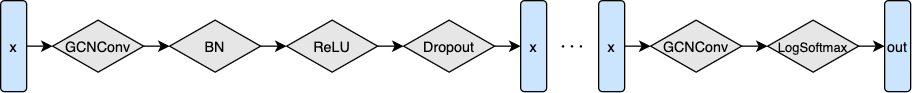

In [16]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # à faire : Implémenter cette fonction qui initialise self.convs, self.bns et self.softmax
    
        super(GCN, self).__init__()

        
    
        ################# Your code here ###########################################
        ## Remarques : 
        ## 1. Vous devez utiliser torch.nn.ModuleList pour self.convs et self.bns
        ## 2. self.convs a num_layers de couches GCNConv 
        ## 3. self.bns a (num_layers - 1) de couches BatchNorm1d 
        ## 4. Utilisez torch.nn.LogSoftmax pour self.softmax
        ## 5. Les paramètres que vous pouvez passer à la couche  GCNConv sont 'in_channels' et 
        ## 'out_channels'. Lien vers la documentation pour plus d'information :
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        ## 6. le seul paramètre que vous devez passer à BatchNorm1d est  'num_features'
        ## Lien vers la documentation pour plus d'information :
        ## https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html


        # Une liste des couches GCNConv  : Vore code Ici
         self.convs = None

        # Une liste de couches 1D de batch normalization : Votre Code Ici
         self.bns = None
            
        # la couche log softmax layer : Votre Code Ici
         self.softmax = None

       ########################################################################################

        # Probabilité d'un élement d'etre mis à 0 
        self.dropout = dropout

        # Sauter la couche de  classification et retourner les embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        # à faire : Implementer la fonction forward 
        # Entrées : feature tensor x, edge_index_tensor adj_t
        # Retour : Tensor Voir la figure 
        
        
        ################# Your code here ###########################################
        ## Remarques : 
        ## 1. Contruire le modèle en suivant la figure ci-dessus
        ## 2. Utilisez torch.nn.functional.relu and torch.nn.functional.dropout 
        ## lien vers documentation : https://pytorch.org/docs/stable/nn.functional.html
        ## 3. F.dropout n'est utilisée qu'au training 
        ## 4. Si return_embeds = True, alors sauter (skip) la couche softmax
        
        out = None
        ##############################################################################################

        return out

In [17]:
def train(model, data, train_idx, optimizer, loss_fn):
    # à faire : implémenter la fonction train qui entraine le modèle
    # en utilisant les argument en entrée : optimizer et loss_fn
    model.train()
    loss = 0

    ##################################### Vore coode ici #####################################
    ## Remarques :
    ## 1. N'oubliez pas mettre les gradients à zero : zero_grad()
    ## 2. Passez data au modèle
    ## 3. Découpez (Tranchez) la sortie du modèle et de les étiquettes data.y par train_idx
    ## 4. Passez l'ouput et les étiquettes tranchés à loss_fn
    
    

    ##########################################################################################

    loss.backward()
    optimizer.step()

    return loss.item()s

In [18]:
# La fonction Test
@torch.no_grad()
def test(model, data, split_idx, evaluator):
    # à faire : Implémenter cette fonction qui test votre modèle 
    # en utilisant les arguments split_idx and evaluator.
    model.eval()

    # L'output du model de tous les élements de data
    out = None

    ############# Votre code ici #########################################
    ## Remarque: (Une ligne de code)
    ## 1. Aucun découpage des données par index ici
   
    
    ##############################################################################

    y_pred = out.argmax(dim=-1, keepdim=True)

    train_acc = evaluator.eval({
        'y_true': data.y[split_idx['train']],
        'y_pred': y_pred[split_idx['train']],
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': data.y[split_idx['valid']],
        'y_pred': y_pred[split_idx['valid']],
    })['acc']
    test_acc = evaluator.eval({
        'y_true': data.y[split_idx['test']],
        'y_pred': y_pred[split_idx['test']],
    })['acc']

    return train_acc, valid_acc, test_acc

In [19]:
# Ne changez pas les valeurs des ces arguments
args = {
    'device': device,
    'num_layers': 3,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.01,
    'epochs': 100,
}
args

{'device': 'cpu',
 'num_layers': 3,
 'hidden_dim': 256,
 'dropout': 0.5,
 'lr': 0.01,
 'epochs': 100}

In [20]:
model = GCN(data.num_features, args['hidden_dim'],
            dataset.num_classes, args['num_layers'],
            args['dropout']).to(device)
evaluator = Evaluator(name='ogbn-arxiv')

In [21]:
import copy

# reset the parameters to initial random value
model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = F.nll_loss

best_model = None
best_valid_acc = 0

for epoch in range(1, 1 + args["epochs"]):
  loss = train(model, data, train_idx, optimizer, loss_fn)
  result = test(model, data, split_idx, evaluator)
  train_acc, valid_acc, test_acc = result
  if valid_acc > best_valid_acc:
      best_valid_acc = valid_acc
      best_model = copy.deepcopy(model)
  print(f'Epoch: {epoch:02d}, '
        f'Loss: {loss:.4f}, '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

C:\Users\Kiouche\AppData\Local\Temp\ipykernel_3768\2758887035.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = x if self.return_embeds else self.softmax(x)


Epoch: 01, Loss: 4.3024, Train: 11.68%, Valid: 23.21% Test: 21.65%
Epoch: 02, Loss: 2.3311, Train: 24.55%, Valid: 23.48% Test: 29.28%
Epoch: 03, Loss: 1.9701, Train: 23.22%, Valid: 18.20% Test: 16.45%
Epoch: 04, Loss: 1.8003, Train: 29.35%, Valid: 29.34% Test: 31.33%
Epoch: 05, Loss: 1.6826, Train: 33.23%, Valid: 27.67% Test: 31.65%
Epoch: 06, Loss: 1.5940, Train: 36.85%, Valid: 29.84% Test: 33.66%
Epoch: 07, Loss: 1.5406, Train: 37.44%, Valid: 28.96% Test: 31.89%
Epoch: 08, Loss: 1.4764, Train: 34.72%, Valid: 25.18% Test: 26.46%
Epoch: 09, Loss: 1.4314, Train: 32.92%, Valid: 26.24% Test: 28.48%
Epoch: 10, Loss: 1.3996, Train: 32.01%, Valid: 28.59% Test: 33.40%
Epoch: 11, Loss: 1.3626, Train: 31.24%, Valid: 28.77% Test: 34.14%
Epoch: 12, Loss: 1.3281, Train: 32.18%, Valid: 29.19% Test: 34.70%
Epoch: 13, Loss: 1.3002, Train: 35.65%, Valid: 32.08% Test: 37.69%
Epoch: 14, Loss: 1.2816, Train: 39.80%, Valid: 36.75% Test: 42.14%
Epoch: 15, Loss: 1.2605, Train: 43.60%, Valid: 41.93% Test: 47

In [22]:
best_result = test(best_model, data, split_idx, evaluator)
train_acc, valid_acc, test_acc = best_result
print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

Best model: Train: 73.40%, Valid: 71.95% Test: 71.15%


C:\Users\Kiouche\AppData\Local\Temp\ipykernel_3768\2758887035.py:77: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = x if self.return_embeds else self.softmax(x)


# Partie 3 : GNN pour la classification de graphes

Dans cette partie, nous allons créer un réseau de neurones de graphes GNN pour la prédiction des propriétés de graphes (classification de graphes)

## Chargement et prétraitement des données

In [10]:
from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
from torch_geometric.data import DataLoader
from tqdm.notebook import tqdm

# Chargement du dataset 
dataset = PygGraphPropPredDataset(name='ogbg-molhiv')

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: {}'.format(device))

split_idx = dataset.get_idx_split()

# Afficher le type de la tâche (ça devrait afficher  classification binaire)
print('Task type: {}'.format(dataset.task_type))

Device: cpu
Task type: binary classification


In [11]:
# chargement des données 
# On va entrainer le modèle de classification de graphes sur des batchs de 32 graphes
# Mélanger (Shuffle) l'ordre des graphes dans l'ensemble d'entrainement
train_loader = DataLoader(dataset[split_idx["train"]], batch_size=32, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset[split_idx["valid"]], batch_size=32, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset[split_idx["test"]], batch_size=32, shuffle=False, num_workers=0)

C:\Users\Kiouche\anaconda3\envs\GDL\lib\site-packages\torch_geometric\deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [12]:
# Ne changez pas ces valeurs
args = {
    'device': device,
    'num_layers': 5,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.001,
    'epochs': 30,
}
args

{'device': 'cpu',
 'num_layers': 5,
 'hidden_dim': 256,
 'dropout': 0.5,
 'lr': 0.001,
 'epochs': 30}

## Le modèle de  classification de graphes

Nous allons maintenant impélementer notre GCN pour la prédiction des propriétés de graphes (classification de graphes)

Nous allons réutiliser le modèle précèdent pour générer les plongements des nœuds et utiliser un Pooling global sur les nœuds pour prédire les propriétés du graphe en entier.	

In [27]:
from ogb.graphproppred.mol_encoder import AtomEncoder
from torch_geometric.nn import global_add_pool, global_mean_pool

### GCN to predict graph property
class GCN_Graph(torch.nn.Module):
    def __init__(self, hidden_dim, output_dim, num_layers, dropout):
        super(GCN_Graph, self).__init__()

        # Load encoders for Atoms in molecule graphs
        self.node_encoder = AtomEncoder(hidden_dim)

        # Node embedding model
        # Note that the input_dim and output_dim are set to hidden_dim
        self.gnn_node = GCN(hidden_dim, hidden_dim,
            hidden_dim, num_layers, dropout, return_embeds=True)

        

        ############# Your code here ############
        ## Note:
        ## 1. Initialisez  self.pool par global mean pooling layer
        ## Lien vers la documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        ## (une ligne de code )
        
        self.pool = None
        #########################################

        # Output layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)


    def reset_parameters(self):
      self.gnn_node.reset_parameters()
      self.linear.reset_parameters()

    def forward(self, batched_data):
        # Input :  tensor batched_data,
        # Output : tensor for each graph.
        x, edge_index, batch = batched_data.x, batched_data.edge_index, batched_data.batch
        embed = self.node_encoder(x)

        out = None

        ############# Votre code ici ###########################################
        ## Note:
        ## 1. Contruire les plongements de noeuds en utilisant le GCN précédent
        ## 2. Utiliser global pooling layer pour constuire les features du graphe en entier
        ## Lien vers la documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#global-pooling-layers
        ## 3. Utilisez le couche linear layer  pour prédire la propriété du graphe
        

        ########################################################

        return out

In [28]:
def train(model, device, data_loader, optimizer, loss_fn):

    model.train()
    loss = 0

    for step, batch in enumerate(tqdm(data_loader, desc="Iteration")):
      batch = batch.to(device)

      if batch.x.shape[0] == 1 or batch.batch[-1] == 0:
          pass
      else:
        ## ignorer nan targets (unlabeled) lors du calcul du training loss.
        is_labeled = batch.y == batch.y

        ############# Votre code ici ############
        ## Remarques:
        ## 1. N'oubliez pas mettre les gradients à zero : zero_grad()
        ## 2. Passez data au modèle
        ## 3. Utilisez le masque 'is_labeled' pour filtrer outut et labels
        ## 4. Changez le type du label à float
        ## 5. Passez l'ouput et les étiquettes tranchés à loss_fn
        

        #########################################

        loss.backward()
        optimizer.step()

    return loss.item()

In [31]:
# La fonction d'évaluation
def eval(model, device, loader, evaluator):
    model.eval()
    y_true = []
    y_pred = []

    for step, batch in enumerate(tqdm(loader, desc="Iteration")):
        batch = batch.to(device)

        if batch.x.shape[0] == 1:
            pass
        else:
            with torch.no_grad():
                pred = model(batch)

            y_true.append(batch.y.view(pred.shape).detach().cpu())
            y_pred.append(pred.detach().cpu())

    y_true = torch.cat(y_true, dim = 0).numpy()
    y_pred = torch.cat(y_pred, dim = 0).numpy()

    input_dict = {"y_true": y_true, "y_pred": y_pred}

    return evaluator.eval(input_dict)

In [29]:
model = GCN_Graph(args['hidden_dim'],
            dataset.num_tasks, args['num_layers'],
            args['dropout']).to(device)
evaluator = Evaluator(name='ogbg-molhiv')

In [33]:
import copy

model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = torch.nn.BCEWithLogitsLoss()

best_model = None
best_valid_acc = 0

for epoch in range(1, 1 + args["epochs"]):
  print('Training...')
  loss = train(model, device, train_loader, optimizer, loss_fn)

  print('Evaluating...')
  train_result = eval(model, device, train_loader, evaluator)
  val_result = eval(model, device, valid_loader, evaluator)
  test_result = eval(model, device, test_loader, evaluator)

  train_acc, valid_acc, test_acc = train_result[dataset.eval_metric], val_result[dataset.eval_metric], test_result[dataset.eval_metric]
  if valid_acc > best_valid_acc:
      best_valid_acc = valid_acc
      best_model = copy.deepcopy(model)
  print(f'Epoch: {epoch:02d}, '
        f'Loss: {loss:.4f}, '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 01, Loss: 0.0105, Train: 73.65%, Valid: 76.40% Test: 73.39%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 02, Loss: 0.0282, Train: 75.75%, Valid: 74.49% Test: 71.74%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 03, Loss: 0.0657, Train: 72.69%, Valid: 71.48% Test: 67.87%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 04, Loss: 0.5827, Train: 77.91%, Valid: 77.21% Test: 73.52%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 05, Loss: 0.0164, Train: 77.10%, Valid: 73.45% Test: 73.40%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 06, Loss: 0.4941, Train: 78.17%, Valid: 74.96% Test: 73.73%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 07, Loss: 0.0152, Train: 78.81%, Valid: 74.42% Test: 73.80%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 08, Loss: 0.6326, Train: 77.75%, Valid: 76.28% Test: 69.19%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 09, Loss: 0.0300, Train: 79.26%, Valid: 77.10% Test: 73.85%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 10, Loss: 0.0364, Train: 79.43%, Valid: 74.79% Test: 71.93%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 11, Loss: 0.0146, Train: 79.05%, Valid: 74.13% Test: 73.23%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 12, Loss: 0.8998, Train: 79.98%, Valid: 75.09% Test: 74.90%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 13, Loss: 0.0377, Train: 80.02%, Valid: 76.88% Test: 73.38%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 14, Loss: 0.6727, Train: 80.48%, Valid: 76.72% Test: 73.54%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 15, Loss: 0.0500, Train: 80.53%, Valid: 75.41% Test: 75.36%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 16, Loss: 0.9198, Train: 81.81%, Valid: 75.91% Test: 74.85%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 17, Loss: 0.0585, Train: 80.80%, Valid: 74.94% Test: 74.67%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 18, Loss: 0.0209, Train: 81.91%, Valid: 78.55% Test: 73.48%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 19, Loss: 0.0217, Train: 82.09%, Valid: 77.03% Test: 74.32%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 20, Loss: 0.0285, Train: 81.70%, Valid: 79.17% Test: 72.42%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 21, Loss: 0.0206, Train: 82.16%, Valid: 79.97% Test: 72.76%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 22, Loss: 0.0211, Train: 82.45%, Valid: 75.96% Test: 74.50%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 23, Loss: 0.0288, Train: 82.99%, Valid: 79.10% Test: 74.26%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 24, Loss: 0.0135, Train: 82.83%, Valid: 81.23% Test: 75.65%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 25, Loss: 0.0177, Train: 83.22%, Valid: 77.59% Test: 75.14%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 26, Loss: 0.0321, Train: 83.36%, Valid: 78.97% Test: 76.09%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 27, Loss: 0.7269, Train: 84.01%, Valid: 77.97% Test: 75.76%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 28, Loss: 0.0231, Train: 83.91%, Valid: 78.42% Test: 75.81%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 29, Loss: 0.1230, Train: 82.49%, Valid: 76.24% Test: 74.15%
Training...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Evaluating...


Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Epoch: 30, Loss: 0.3490, Train: 83.82%, Valid: 79.38% Test: 75.76%


In [34]:
train_acc = eval(best_model, device, train_loader, evaluator)[dataset.eval_metric]
valid_acc = eval(best_model, device, valid_loader, evaluator)[dataset.eval_metric]
test_acc = eval(best_model, device, test_loader, evaluator)[dataset.eval_metric]

print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

Iteration:   0%|          | 0/1029 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Iteration:   0%|          | 0/129 [00:00<?, ?it/s]

Best model: Train: 82.83%, Valid: 81.23% Test: 75.65%


## Faites des tests avec deux autres couches de global pooling de Pytorch Geometric.

In [ ]:
# Réutilisez le code précédent (en changeant uniquement la couche de pooling)